<a href="https://colab.research.google.com/github/SalgadoHUB/Classical_Mechanics_II/blob/main/simple_pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Péndulo simple: grandes vs pequeñas oscilaciones (Resolución de ODEs)

In [ ]:
# importamos librerías
from sympy import*
from sympy.physics.mechanics import *

# Permite devolver resultados escritos con LaTeX (mejora la lectura)
init_vprinting()


## Péndulo simple. Grandes oscilaciones

Coordenadas:


$x_m = R \sin \theta ~~~~~~~~~~~~~~~~~~~~~~  y_m = - R \cos \theta$,

Energías:

$T = \frac{1}{2} m (\dot x_m^2 + \dot y_m^2)  ~~~~~~~~~~ V = m g y_m$

In [ ]:
# variables simbólicas
m, g, R, t = symbols('m g R t')
theta = dynamicsymbols('theta')

# definimos xm, ym (posición de la masa)
xm = R*sin(theta)
ym = -R*cos(theta)

# derivadas
xm_dot = diff(xm, t)
ym_dot = diff(ym, t)

theta_dot = diff(theta, t)
theta_ddot = diff(theta_dot, t)

# Lagrangiano
T = 1/2*m*(xm_dot**2 + ym_dot**2)
V = m*g*ym
L = T - V


Ecuaciones de Lagrange:

$~~~~~~~~~~~~~~~~~~~~~~ \dfrac{d}{dt} \bigg( \dfrac{\partial L}{\partial \dot \theta} \bigg) - \dfrac{\partial L}{\partial \theta} = 0$

In [ ]:
# Ecuaciones de Euler-Lagrange
eqn = diff ( diff(L, theta_dot), t) - diff(L, theta)

# Solution
sln = solve(eqn, theta_ddot)[0]
Eq(theta_ddot, sln)

    -g⋅sin(θ) 
θ̈ = ──────────
        R     

In [ ]:
solve(eqn, theta_ddot)[0]

-g⋅sin(θ) 
──────────
    R     

In [ ]:
# sistema de ODEs
x = Matrix([theta, theta_dot])
x_dot = diff(x, t)
Eq(x_dot, Matrix([theta_dot, sln]))

      ⎡    θ̇     ⎤
⎡θ̇⎤   ⎢          ⎥
⎢ ⎥ = ⎢-g⋅sin(θ) ⎥
⎣θ̈⎦   ⎢──────────⎥
      ⎣    R     ⎦

## Péndulo simple. Pequeñas oscilaciones

Partimos dela solución anterior,

In [ ]:
sln

-g⋅sin(θ) 
──────────
    R     

Sustituimos $sin(θ)$ por $\theta$

In [ ]:
sln_aprox = sln.subs(sin(theta),theta)

# Presentamos la ecuación en modo texto
eq_aprox = Eq(theta_ddot, sln_aprox)
eq_aprox

    -g⋅θ 
θ̈ = ─────
      R  

## Resolución de la ODE

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp

# matplotlib imports
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


# Usamos valores (g, R) numéricos
g_value = 9.8
R_value = 1

# Calculamos T0 (periodo)
T0  = 2*np.pi*sqrt(R_value/g_value)

# Condiciones iniciales: theta=45 deg, velocidad=0
theta0 = np.deg2rad(45)
theta_dot0 = 0

# En el sistema de ODEs, y[0] es theta, y[1] es theta_dot
def pendulum_ODE(t, y):
    return (y[1], -g_value*np.sin(y[0])/R_value)

def pendulum_aprox_ODE(t, y):
    return (y[1], -g_value*y[0]/R_value)

# Resolvemos la ODE, con 30 fps, pata 5T0
sol = solve_ivp(pendulum_ODE, [0, 5*T0], (theta0, theta_dot0),
    t_eval=np.linspace(0,float(5*T0),30*5))
sol_aprox = solve_ivp(pendulum_aprox_ODE, [0, 5*T0], (theta0, theta_dot0),
    t_eval=np.linspace(0,float(5*T0),30*5))

# Extraemos la solución y convertimos rad-grados
theta_deg = np.rad2deg(sol.y[0])
theta_dot_deg = np.rad2deg(sol.y[1])
t = sol.t

theta_deg_aprox = np.rad2deg(sol_aprox.y[0])
theta_dot_deg_aprox = np.rad2deg(sol_aprox.y[1])
t_aprox=sol_aprox.t


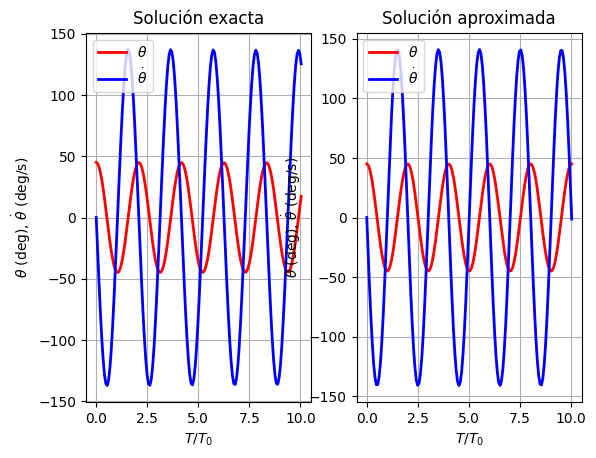

In [ ]:
# Dibujamos las soluciones obtenidas
plt.subplot(1,2,1)
plt.plot(t, theta_deg, 'r', lw=2, label=r'$\theta$')
plt.plot(t, theta_dot_deg, 'b', lw=2, label=r'$\dot \theta$')
plt.title('Solución exacta')
plt.legend()
plt.xlabel(r'$T/T_0$')
plt.ylabel(r'$\theta$ (deg), $\dot \theta$ (deg/s)')
plt.grid()

plt.subplot(1,2,2)
plt.plot(t_aprox, theta_deg_aprox, 'r', lw=2, label=r'$\theta$')
plt.plot(t_aprox, theta_dot_deg_aprox, 'b', lw=2, label=r'$\dot \theta$')
plt.title('Solución aproximada')
plt.legend()
plt.xlabel(r'$T/T_0$')
plt.ylabel(r'$\theta$ (deg), $\dot \theta$ (deg/s)')
plt.grid()

plt.show()

En las gráficas se ve que los periodos son ligeramente diferentes. Dibujamos ahora un diagrama de fases (theta frente a theta_dot).

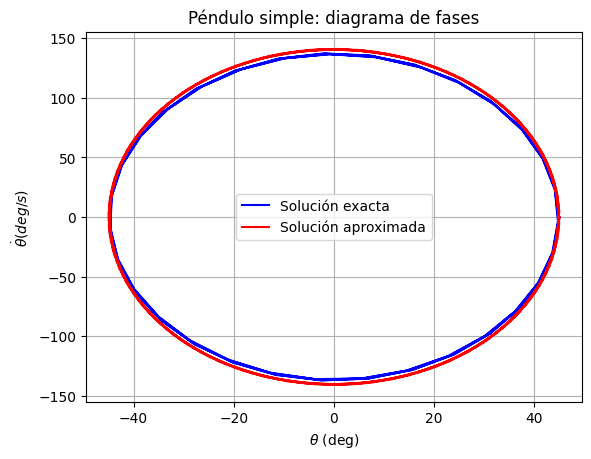

In [ ]:
# Diagrama de fases para theta, theta_dot
plt.plot(theta_deg, theta_dot_deg, 'b', label='Solución exacta')
plt.plot(theta_deg_aprox, theta_dot_deg_aprox, 'r', label='Solución aproximada')
plt.title('Péndulo simple: diagrama de fases')
plt.xlabel(r'$\theta$ (deg)')
plt.ylabel(r'$\dot \theta (deg/s)$')
plt.grid()
plt.legend()
plt.show()

### Uso de lambdify
Podemos usar la función `lambdify()` para convertir una expresión analítica de `sympy` a una función numérica evaluable mediante `scipy`o `numpy`.

Nuestras ecuaciones del movimiento son ODEs de segundo orden. Para resolverlas tenemos que escribirlas de la siguiente manera:

In [ ]:
deriv_1 = theta_dot # igual para las dos soluciones, exacta y aproximada

deriv_2 =sln
deriv_2_aprox =sln_aprox

Convertimos nuestras variables simbólicas en numéricas mediante `lambdify()`:

In [ ]:
deriv1_f = lambdify(theta_dot, deriv_1)

deriv2_f = lambdify((theta, theta_dot, g, R), deriv_2)
deriv2_f_aprox = lambdify((theta, theta_dot, g, R), deriv_2_aprox)

def eq_mov_num(y0, t, g, R):
    return [
        deriv1_f(y0[1]), #dtheta/dt
        deriv2_f(y0[0], y0[1],g, R) #domega/dt
    ]

def eq_mov_num_aprox(y0, t, g, R):
    return [
        deriv1_f(y0[1]), #dtheta/dt
        deriv2_f_aprox(y0[0], y0[1],g, R) #domega/dt
    ]

Resolvemos la ODE, esta vez mediante la función `odeint()`, que tendremos que importarla.

In [ ]:
from scipy.integrate import odeint

values = (g_value, R_value)

# Condiciones iniciales: theta=45 deg, velocidad=0
theta0 = np.deg2rad(45)
theta_dot0 = 0

t=np.linspace(0,float(5*T0),30*5)

sol = odeint(eq_mov_num, [theta0, theta_dot0], t=t, args=values)
sol_aprox = odeint(eq_mov_num_aprox, y0=[theta0, theta_dot0], t=t, args=values)


Extraemos la solución numérica y la convertimos a grados, para representar.

In [ ]:
theta_deg = np.rad2deg(sol.T[0])
theta_dot_deg = np.rad2deg(sol.T[1])

theta_deg_aprox = np.rad2deg(sol_aprox.T[0])
theta_dot_deg_aprox = np.rad2deg(sol_aprox.T[1])

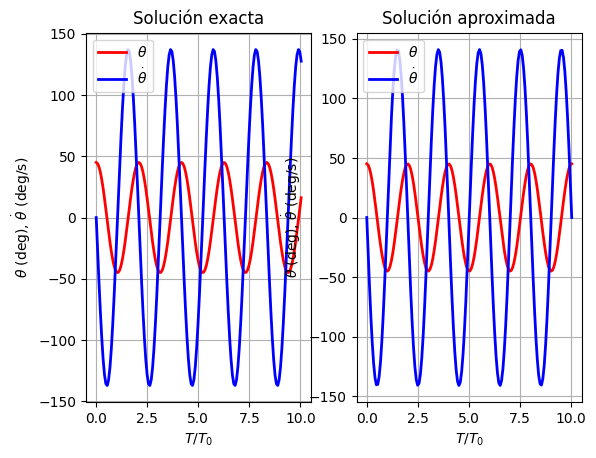

In [ ]:
# Dibujamos las soluciones obtenidas
plt.subplot(1,2,1)
plt.plot(t, theta_deg, 'r', lw=2, label=r'$\theta$')
plt.plot(t, theta_dot_deg, 'b', lw=2, label=r'$\dot \theta$')
plt.title('Solución exacta')
plt.legend()
plt.xlabel(r'$T/T_0$')
plt.ylabel(r'$\theta$ (deg), $\dot \theta$ (deg/s)')
plt.grid()

plt.subplot(1,2,2)
plt.plot(t_aprox, theta_deg_aprox, 'r', lw=2, label=r'$\theta$')
plt.plot(t_aprox, theta_dot_deg_aprox, 'b', lw=2, label=r'$\dot \theta$')
plt.title('Solución aproximada')
plt.legend()
plt.xlabel(r'$T/T_0$')
plt.ylabel(r'$\theta$ (deg), $\dot \theta$ (deg/s)')
plt.grid()

plt.show()

# Anexo: animación

Pdemos relaizar una animación con los datos generados anteriormente. Usamos la función `animation` de m`matplotlib`.

In [ ]:
# Importamos las librerías de Matplotlib para crear animaciones
import matplotlib.animation as animation
from matplotlib import rc

# Para tener la animacion en el propio cuaderno de Colab
# (otra opción sería descargarla como un gid o un video)
rc('animation', html='jshtml')


def pend_pos(theta):
    return (R_value*np.sin(theta), -R_value*np.cos(theta))

# creamos figura
fig = plt.figure()
ax = fig.add_subplot(aspect='equal')
ax.set_xlim(-1, 1)
ax.set_ylim(-1.25, 0.25)
ax.grid()

x0, y0 = pend_pos(theta0)
line, = ax.plot([0, x0], [0, y0], lw=2, c='k')
circle = ax.add_patch(plt.Circle(pend_pos(theta0), 0.05, fc='b', zorder=3, label='exacta'))
line_aprox, = ax.plot([0, x0], [0, y0], lw=2, c='k')
circle_aprox = ax.add_patch(plt.Circle(pend_pos(theta0), 0.05, fc='r', zorder=3, label='aproximada'))
ax.legend()

# dibujamos cada frame "i"
def animate(i):
    x,y = pend_pos(np.deg2rad(theta_deg[i]))
    x_aprox,y_aprox = pend_pos(np.deg2rad(theta_deg_aprox[i]))
    line.set_data([0, x], [0, y])
    circle.set_center((x, y))
    line_aprox.set_data([0, x_aprox], [0, y_aprox])
    circle_aprox.set_center((x_aprox, y_aprox))
    return line, circle, circle_aprox

# Dibujamos. Con "interval" controlamos la velocidad
ani = animation.FuncAnimation(fig, animate, blit=True, interval=40, frames=len(t))

plt.close() # para que no salga una gráfica espúria.
ani
